# Milestone 3 Code

In [1]:
#import modules

import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns


## OLS for exploratory analysis

In [2]:
# Import data
df = pd.read_csv('Aftercleaning.csv')      #  Data w/o outliers
df_og = pd.read_csv('keepoutliers2.csv')   #  Data with outliers
df_og.head()

,Unnamed: 0,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,0.346932,0.511921,0.0149,0.000000,0.012739,0.003419,0.015337,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.607918,0.490469,0.0225,0.000000,0.070064,0.006326,0.003067,0.972603,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,0.439518,0.535649,0.0089,0.000000,0.428344,0.079159,0.000000,0.531507,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,0.718308,0.565324,0.0080,0.007206,0.012739,0.001539,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,0.593287,0.506972,0.0200,0.001601,0.116242,0.009916,0.000000,0.353425,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [3]:
# df.info()

In [4]:
#remove id
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df_og.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
# Data processing
X = df.loc[:, df.columns != 'price']
y = df['price']

X2 = df_og.loc[:, df_og.columns != 'price']
y2 = df_og['price']

In [6]:
# Add constant term when we do the regression analysis
X['Const'] = 1
X2['Const'] = 1

In [7]:
# Fit a full model with data included outliers
mod_full = sm.OLS(y2,X2).fit()

# Summarize model
mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     399.8
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:46:29   Log-Likelihood:                 99877.
No. Observations:               38843   AIC:                        -1.997e+05
Df Residuals:                   38829   BIC:                        -1.996e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
latitude                             -0.0061      0.001     -5.238      0.000      -0.008      -0.004
longitude                            -0.0237      0.002    -13.722      0.000      -0.027      -0.020
minimum_nights                       -0.0264      0.007     -3.834      0.000      -0.040      -0.013
number_of_reviews                    -0.0123      0.001     -8.267      0.000      -0.015      -0.009
reviews_per_month                     0.0007      0.004      0.184      0.854      -0.007       0.009
calculated_host_listings_count       -0.0031      0.001     -2.545      0.011      -0.005      -0.001
availability_365                      0.0063      0.000     22.371      0.000       0.006       0.007
neighbourhood_group_Bronx             0.0054      0.001      7.394      0.000       0.004       0.007
neighbourhood_group_Brooklyn          0.0038      0.000     12.618      0.000       0.003       0.004
neighbourhood_group_Manhattan         0.0088      0.000     27.727      0.000       0.008       0.009
neighbourhood_group_Queens            0.0060      0.000     11.991      0.000       0.005       0.007
neighbourhood_group_Staten Island    -0.0088      0.001     -9.179      0.000      -0.011      -0.007
room_type_Entire home/apt             0.0129      0.000     44.693      0.000       0.012       0.013
room_type_Private room                0.0029      0.000      9.222      0.000       0.002       0.003
room_type_Shared room                -0.0007      0.001     -1.253      0.210      -0.002       0.000
Const                                 0.0151      0.001     22.026      0.000       0.014       0.016
==============================================================================
Omnibus:                    97954.247   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2393247727.568
Skew:                          27.890   Prob(JB):                         0.00
Kurtosis:                    1217.747   Cond. No.                     1.82e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.01e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
# Fit a full model with data exclude outliers
mod_full = sm.OLS(y,X).fit()

# Summarize model
mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     2443.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:46:29   Log-Likelihood:                 21831.
No. Observations:               37583   AIC:                        -4.363e+04
Df Residuals:                   37569   BIC:                        -4.351e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
latitude                             -0.0749      0.009     -8.734      0.000      -0.092      -0.058
longitude                            -0.4134      0.013    -32.442      0.000      -0.438      -0.388
minimum_nights                       -0.8291      0.051    -16.181      0.000      -0.930      -0.729
number_of_reviews                    -0.0987      0.011     -8.974      0.000      -0.120      -0.077
reviews_per_month                     0.1294      0.030      4.347      0.000       0.071       0.188
calculated_host_listings_count        0.0470      0.009      4.945      0.000       0.028       0.066
availability_365                      0.0614      0.002     28.865      0.000       0.057       0.066
neighbourhood_group_Bronx             0.0907      0.005     16.721      0.000       0.080       0.101
neighbourhood_group_Brooklyn          0.0741      0.002     33.782      0.000       0.070       0.078
neighbourhood_group_Manhattan         0.1524      0.002     64.828      0.000       0.148       0.157
neighbourhood_group_Queens            0.1090      0.004     29.777      0.000       0.102       0.116
neighbourhood_group_Staten Island    -0.1308      0.007    -18.552      0.000      -0.145      -0.117
room_type_Entire home/apt             0.2571      0.002    119.927      0.000       0.253       0.261
room_type_Private room                0.0556      0.002     24.317      0.000       0.051       0.060
room_type_Shared room                -0.0174      0.004     -4.509      0.000      -0.025      -0.010
Const                                 0.2953      0.005     58.073      0.000       0.285       0.305
==============================================================================
Omnibus:                     9890.814   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28485.441
Skew:                           1.383   Prob(JB):                         0.00
Kurtosis:                       6.247   Cond. No.                     9.23e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We use ordinary least square (OLS) to do our regression analysis initially. We want to check whether the features effect we select are statistically significant.

Based on the P-Value on above table, we can observe all p-value are less than 0.05. Thus, it had better to use all features we select for predictive model.

Besides, we can also find the data excluded outliers has a better performance of R-square value in the OLS analysis 

In [9]:
## Trial
# X4 = X.iloc[:, 0:7]
# X4.head()

## Predictive analysis - Model building & Hyperparameter tuning for Predictive analysis

#### Model buliding - 6 methods

In [10]:
### Linear Regression ###

def linear_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_LR= LinearRegression()

    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_LR = GridSearchCV(estimator=model_LR,  
                         param_grid=parameters,
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_LR.fit(input_x, input_y)
    best_parameters_LR = grid_search_LR.best_params_  
    best_score_LR = grid_search_LR.best_score_ 
    print(best_parameters_LR)
    print(best_score_LR)


# linear_reg(nyc_model_x, nyc_model_y)

In [11]:
### Ridge Regression ###

def ridge_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Ridge= Ridge()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_Ridge = GridSearchCV(estimator=model_Ridge,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

   ## Lastly, finding the best parameters.

    grid_search_Ridge.fit(input_x, input_y)
    best_parameters_Ridge = grid_search_Ridge.best_params_  
    best_score_Ridge = grid_search_Ridge.best_score_ 
    print(best_parameters_Ridge)
    print(best_score_Ridge)

In [12]:
### Lasso Regression ###

def lasso_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Lasso= Lasso()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_lasso = GridSearchCV(estimator=model_Lasso,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_lasso.fit(input_x, input_y)
    best_parameters_lasso = grid_search_lasso.best_params_  
    best_score_lasso = grid_search_lasso.best_score_ 
    print(best_parameters_lasso)
    print(best_score_lasso)

# lasso_reg(nyc_model_x, nyc_model_y)

In [13]:
### ElasticNet Regression ###

def elastic_reg(input_x, input_y,cv=5):
    ## Defining parameters
    model_grid_Elastic= ElasticNet()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_elastic = GridSearchCV(estimator=model_grid_Elastic,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_elastic.fit(input_x, input_y)
    best_parameters_elastic = grid_search_elastic.best_params_  
    best_score_elastic = grid_search_elastic.best_score_ 
    print(best_parameters_elastic)
    print(best_score_elastic)

# elastic_reg(nyc_model_x, nyc_model_y)

In [14]:
## XGBoost Regression ##

def xgboost_reg(input_x, input_y, cv=5):
    model_XGB = XGBRegressor(objective='reg:squarederror')
    
    params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'max_depth': [3, 4, 5]
        }
    
    grid_search_xgb = HalvingGridSearchCV(estimator=model_XGB, param_grid=params,
                                  scoring= 'neg_mean_squared_error',
                                  cv=cv,
                                  n_jobs=-1)
    ## Lastly, finding the best parameters.

    grid_search_xgb.fit(input_x, input_y)
    best_parameters_xgb = grid_search_xgb.best_params_  
    best_score_xgb = grid_search_xgb.best_score_ 
    print(best_parameters_xgb)
    print(best_score_xgb)
    
# xgboost_reg(nyc_model_x, nyc_model_y)

In [15]:
## Random Forest Regression ##

def RF_reg(input_x, input_y, cv=5):
    model_RF = RandomForestRegressor()
    
    params = {
        'n_estimators': [5,20,50,100],
        'max_depth': [5, 10, 20, 30],
        'min_samples_split': [2, 6, 10],
        'min_samples_leaf': [1,3,4]
        }
    
    grid_search_RF = HalvingGridSearchCV(estimator=model_RF, param_grid=params,
                                  scoring= 'neg_mean_squared_error',
                                  cv=cv,
                                  n_jobs=-1)
    ## Lastly, finding the best parameters.

    grid_search_RF.fit(input_x, input_y)
    best_parameters_RF = grid_search_RF.best_params_  
    best_score_RF = grid_search_RF.best_score_ 
    print(best_parameters_RF)
    print(best_score_RF)
    
# xgboost_reg(nyc_model_x, nyc_model_y)

#### Split data to 80% train and 20% test

In [16]:
X.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Const
0,0.346932,0.511921,0.000000,0.012739,0.003419,0.015337,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.607918,0.490469,0.000000,0.070064,0.006326,0.003067,0.972603,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,0.439518,0.535649,0.000000,0.428344,0.079159,0.000000,0.531507,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.718308,0.565324,0.007206,0.012739,0.001539,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4,0.593287,0.506972,0.001601,0.116242,0.009916,0.000000,0.353425,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


In [17]:
#split into x and y

X = df.loc[:, df.columns != 'price']
y = df['price']

#Test train split to 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [18]:
#Polynomial transformation
# Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# X_train = Poly.fit_transform(X_train)
# X_test = Poly.fit_transform(X_test)

#### Hyperparameter outputs

In [19]:
#Linear regression
#linear_reg(X, y)

In [20]:
#Ridge Regression
#ridge_reg(X, y)

In [21]:
#Lasso Regression
#lasso_reg(X, y)

In [22]:
#ElasticNet Regression
#elastic_reg(X, y)

In [23]:
#Xgboost Regression
#xgboost_reg(X, y)

In [24]:
#Random Forest Regression
#RF_reg(X, y)

## Model testing

#### Fitting and predicting

In [25]:
# Phase1 - Data w/o outliers

###Linear Regression
model_lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = False)
model_lr.fit(X_train, y_train)
lr_pred= model_lr.predict(X_test)

###Ridge
model_ridge = Ridge(alpha = 1.0, normalize = False)
model_ridge.fit(X_train, y_train)           
pred_ridge = model_ridge.predict(X_test) 

###Lasso
model_Lasso = Lasso(alpha = 0.0001, normalize =False)
model_Lasso.fit(X_train, y_train)
pred_Lasso = model_Lasso.predict(X_test) 

##ElasticNet
model_enet = ElasticNet(alpha = 0.0001, normalize=False)
model_enet.fit(X_train, y_train) 
pred_enet= model_enet.predict(X_test)

#Xgboost
model_xgb = XGBRegressor(gamma = .5, max_depth = 4, min_child_weight = 5)
model_xgb.fit(X_train, y_train) 
pred_xgboost= model_xgb.predict(X_test)

#Random Forest
model_rf = RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100)
model_rf.fit(X_train, y_train) 
pred_rf= model_rf.predict(X_test)


C:\Users\utccc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\utccc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\utccc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:1

#### Model Scores

In [26]:
## Scoring metrics ##

#Linear
Linear_Scores = [mean_absolute_error(y_test, lr_pred), np.sqrt(mean_squared_error(y_test, lr_pred)), r2_score(y_test, lr_pred)]

#Ridge
Ridge_Scores = [mean_absolute_error(y_test, pred_ridge), np.sqrt(mean_squared_error(y_test, pred_ridge)),\
                r2_score(y_test, pred_ridge)]

#Lasso
Lasso_Scores = [mean_absolute_error(y_test, pred_Lasso), np.sqrt(mean_squared_error(y_test, pred_Lasso)),\
               r2_score(y_test, pred_Lasso)]

#Elastic Net
Enet_Scores = [mean_absolute_error(y_test,pred_enet), np.sqrt(mean_squared_error(y_test,pred_enet)),\
              r2_score(y_test, pred_Lasso)]

#XGB
Xgb_Scores = [mean_absolute_error(y_test,pred_xgboost), np.sqrt(mean_squared_error(y_test,pred_xgboost)),\
             r2_score(y_test, pred_xgboost)]

#Random Forest
RF_Scores = [mean_absolute_error(y_test,pred_rf), np.sqrt(mean_squared_error(y_test,pred_rf)),\
            r2_score(y_test, pred_rf)]

In [27]:
#Create dictionary
scores = {"Linear": Linear_Scores,
         "Ridge": Ridge_Scores,
         "Lasso": Lasso_Scores,
         "Elastic Net": Enet_Scores,
         "XGB": Xgb_Scores,
         "Random Forest": RF_Scores}

#Set indeces
score_index = ["MAE", "RMSE", "R Squared"]

#Create dataframe of scores
df_scores = pd.DataFrame(scores, index=score_index)

<AxesSubplot: title={'center': 'Performance of different regression methods'}>

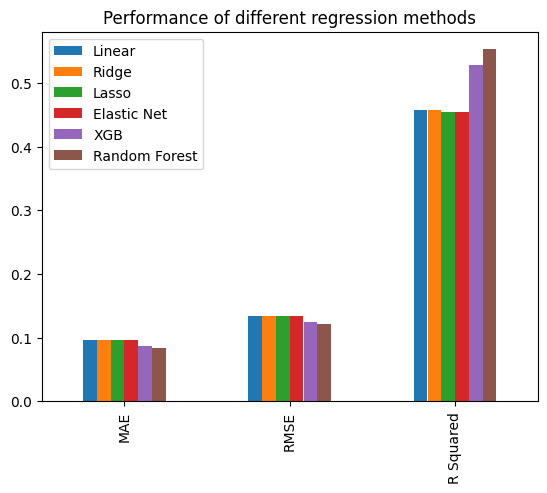

In [28]:
#plot scores
df_scores.plot(kind='bar', title="Performance of different regression methods")

#### Model distribution visualized

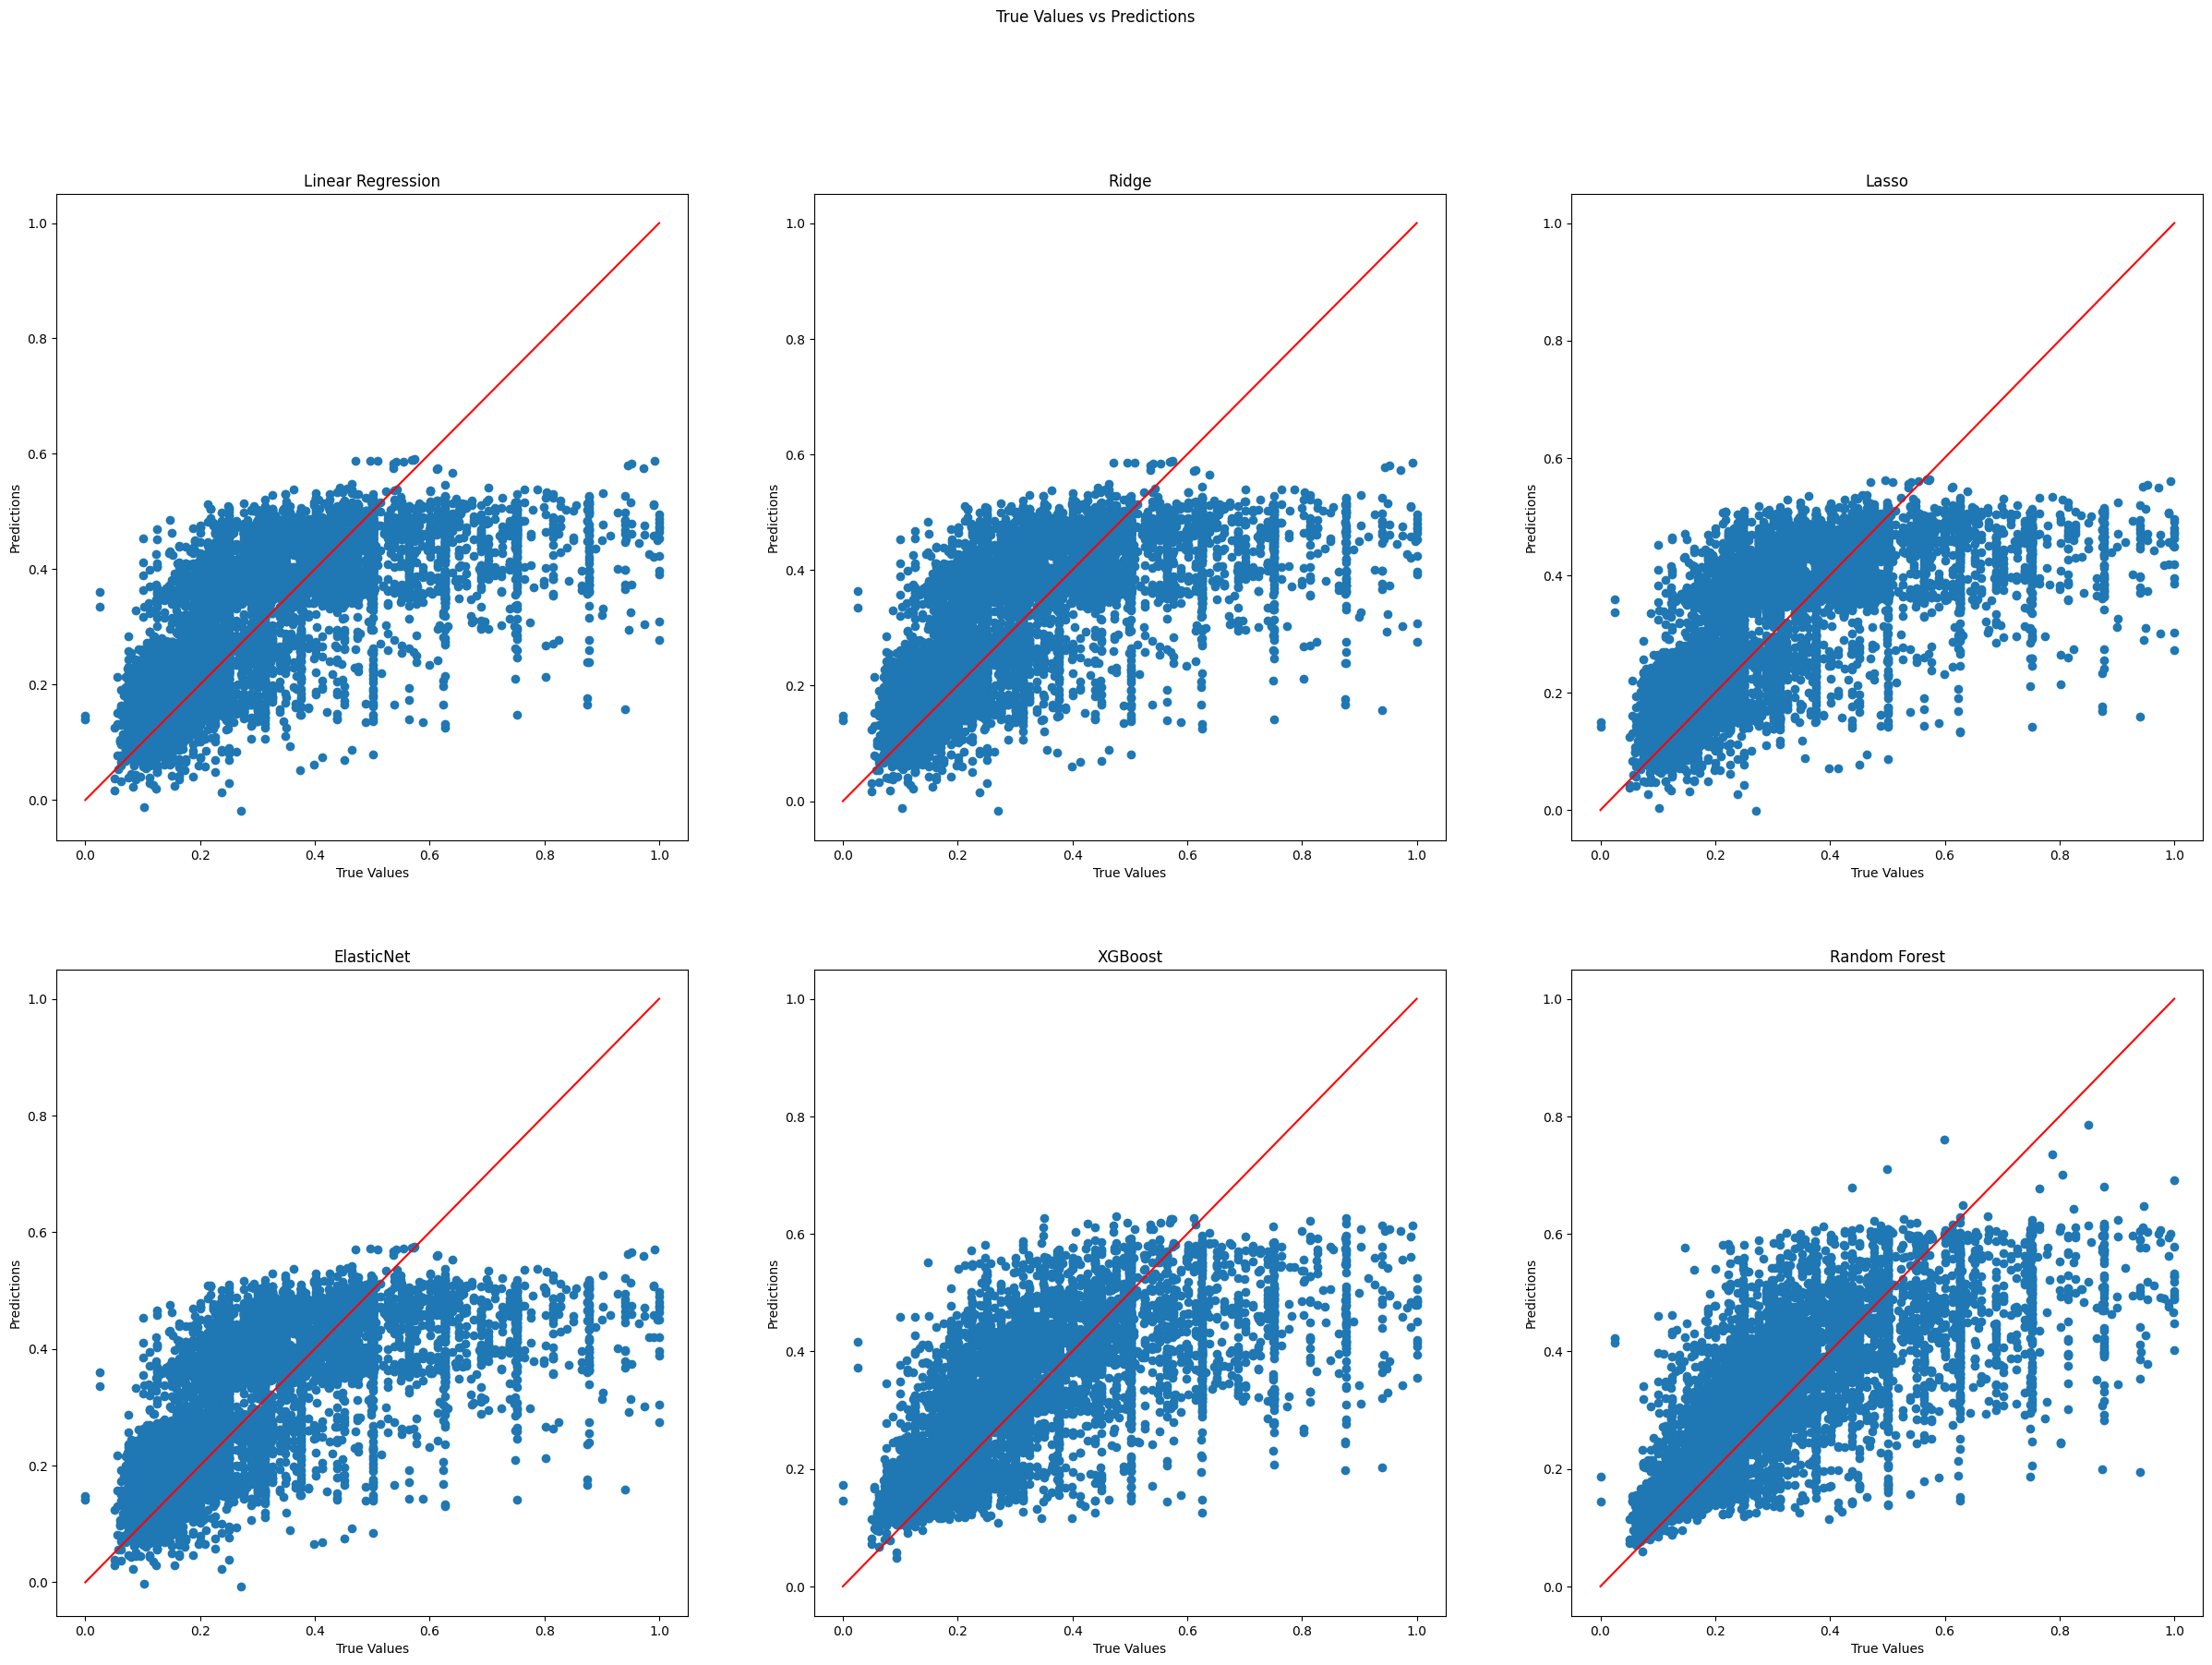

In [29]:
x = [0,0.5,1]
y = [0,0.5,1]



fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(30, 20))
fig.suptitle('True Values vs Predictions')

ax1.scatter(y_test, lr_pred)
ax1.plot(x,y, 'r-')
ax1.set_title('Linear Regression')

ax2.scatter(y_test, pred_ridge)
ax2.plot(x,y, 'r-')
ax2.set_title('Ridge')

ax3.scatter(y_test, pred_Lasso)
ax3.plot(x,y, 'r-')
ax3.set_title('Lasso')

ax4.scatter(y_test, pred_enet)
ax4.plot(x,y, 'r-')
ax4.set_title('ElasticNet')

ax5.scatter(y_test, pred_xgboost)
ax5.plot(x,y, 'r-')
ax5.set_title('XGBoost')

ax6.scatter(y_test, pred_rf)
ax6.plot(x,y, 'r-')
ax6.set_title('Random Forest')

for ax in fig.get_axes():
    ax.set(xlabel='True Values', ylabel='Predictions')